In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

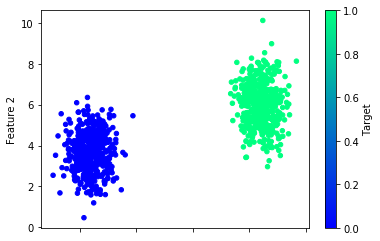

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 591us/step - loss: 0.6841 - accuracy: 0.8787
Epoch 2/100
24/24 [==============================] - 0s 774us/step - loss: 0.6775 - accuracy: 0.9973
Epoch 3/100
24/24 [==============================] - 0s 621us/step - loss: 0.6700 - accuracy: 0.9987
Epoch 4/100
24/24 [==============================] - 0s 674us/step - loss: 0.6612 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 703us/step - loss: 0.6513 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 578us/step - loss: 0.6404 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 787us/step - loss: 0.6282 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 756us/step - loss: 0.6152 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 681us/step - loss: 0.6011 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 837us/step - loss: 0.5865 - accura

24/24 [==============================] - 0s 692us/step - loss: 0.1005 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 715us/step - loss: 0.0988 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 658us/step - loss: 0.0971 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 610us/step - loss: 0.0955 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 605us/step - loss: 0.0940 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 586us/step - loss: 0.0924 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 572us/step - loss: 0.0909 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 556us/step - loss: 0.0895 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 553us/step - loss: 0.0880 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 553us/step - loss: 0.0866 - accuracy: 

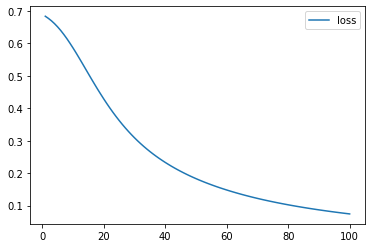

In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

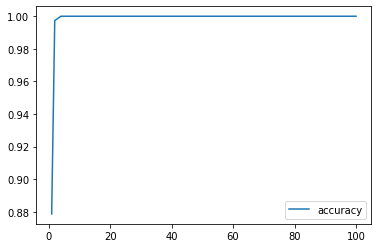

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0694 - accuracy: 1.0000
Loss: 0.06942778080701828, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

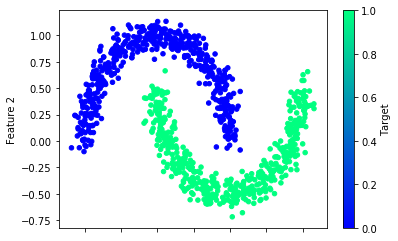

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 814us/step - loss: 0.9072 - accuracy: 0.5360
Epoch 2/100
24/24 [==============================] - 0s 932us/step - loss: 0.8202 - accuracy: 0.5560
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.5760
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7181 - accuracy: 0.5867
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.6013
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.6093
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6434 - accuracy: 0.6173
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.6253
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6120 - accuracy: 0.6333
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.6413
Epoch

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.8693
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8693
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2899 - accuracy: 0.8693
Epoch 86/100
24/24 [==============================] - 0s 956us/step - loss: 0.2887 - accuracy: 0.8707
Epoch 87/100
24/24 [==============================] - 0s 983us/step - loss: 0.2874 - accuracy: 0.8707
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8707
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8720
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8733
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8733
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8

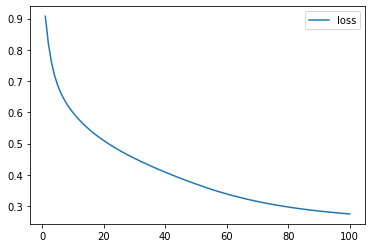

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

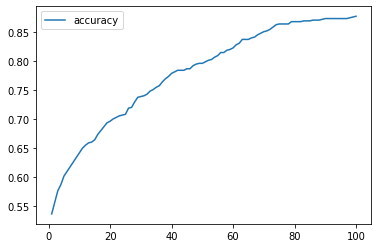

In [21]:
# Plot the loss
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 621us/step - loss: 0.8435 - accuracy: 0.2267
Epoch 2/100
24/24 [==============================] - 0s 696us/step - loss: 0.8075 - accuracy: 0.2387
Epoch 3/100
24/24 [==============================] - 0s 626us/step - loss: 0.7728 - accuracy: 0.2747
Epoch 4/100
24/24 [==============================] - 0s 637us/step - loss: 0.7388 - accuracy: 0.3293
Epoch 5/100
24/24 [==============================] - 0s 780us/step - loss: 0.7048 - accuracy: 0.4267
Epoch 6/100
24/24 [==============================] - 0s 598us/step - loss: 0.6703 - accuracy: 0.4893
Epoch 7/100
24/24 [==============================] - 0s 677us/step - loss: 0.6359 - accuracy: 0.6693
Epoch 8/100
24/24 [==============================] - 0s 899us/step - loss: 0.6018 - accuracy: 0.8133
Epoch 9/100
24/24 [==============================] - 0s 644us/step - loss: 0.5680 - accuracy: 0.8627
Epoch 10/100
24/24 [==============================] - 0s 619us/step - loss: 0.5353 - accura

24/24 [==============================] - 0s 708us/step - loss: 0.2270 - accuracy: 0.9027
Epoch 82/100
24/24 [==============================] - 0s 757us/step - loss: 0.2265 - accuracy: 0.9027
Epoch 83/100
24/24 [==============================] - 0s 687us/step - loss: 0.2260 - accuracy: 0.9027
Epoch 84/100
24/24 [==============================] - 0s 752us/step - loss: 0.2256 - accuracy: 0.9027
Epoch 85/100
24/24 [==============================] - 0s 660us/step - loss: 0.2253 - accuracy: 0.9027
Epoch 86/100
24/24 [==============================] - 0s 848us/step - loss: 0.2248 - accuracy: 0.9040
Epoch 87/100
24/24 [==============================] - 0s 689us/step - loss: 0.2243 - accuracy: 0.9040
Epoch 88/100
24/24 [==============================] - 0s 617us/step - loss: 0.2239 - accuracy: 0.9040
Epoch 89/100
24/24 [==============================] - 0s 628us/step - loss: 0.2234 - accuracy: 0.9040
Epoch 90/100
24/24 [==============================] - 0s 623us/step - loss: 0.2231 - accuracy: 